In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data=pd.read_csv("/content/Crop_recommendation.csv")

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
data.shape

(2200, 8)

In [8]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
data.drop_duplicates(inplace= True)

In [10]:
data.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [11]:
print(data['label'].unique())
print(" " , len(data['label'].unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
  22


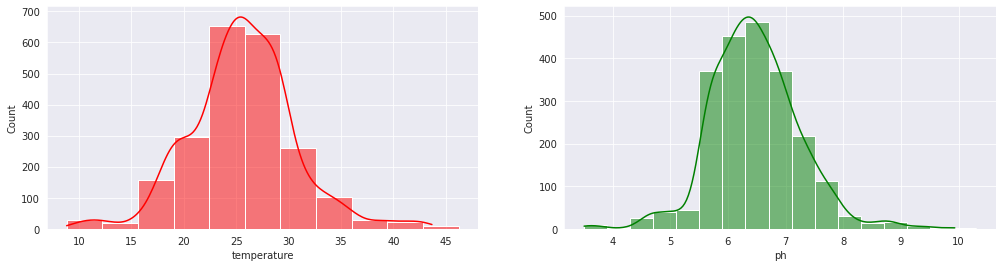

In [12]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(data.temperature ,binwidth=3.4 , color="red" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(data.ph ,binwidth=0.4 ,color = "green", kde={'alpha':0.5})
plt.show()

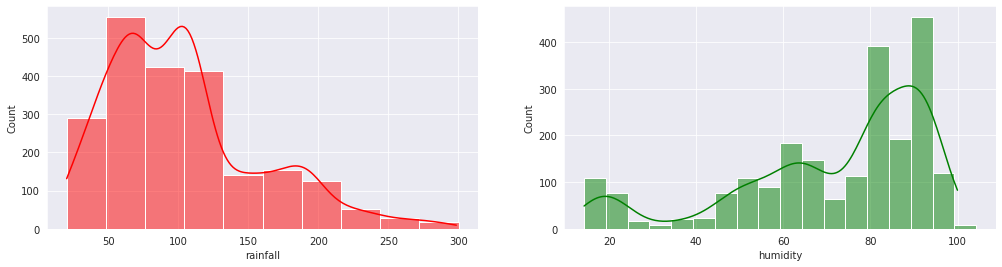

In [13]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(data.rainfall ,  binwidth=28 ,color="red" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(data.humidity ,  binwidth=5 ,color="green" , kde={'alpha':0.5})

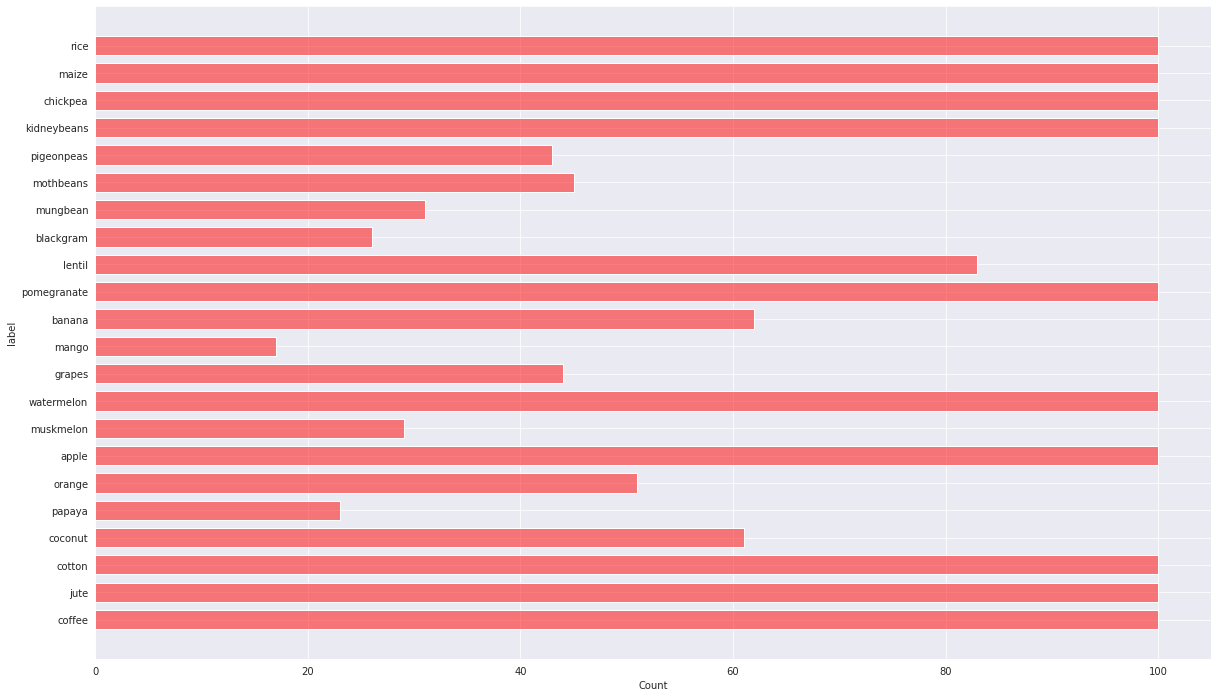

In [14]:
plt.figure(figsize=(20,12))
data_Median_Temperatures =data.query("temperature > 15  & temperature <= 28 ") 
sns.histplot(y=data_Median_Temperatures.label, shrink=.7 ,color="red" , alpha=0.5 )

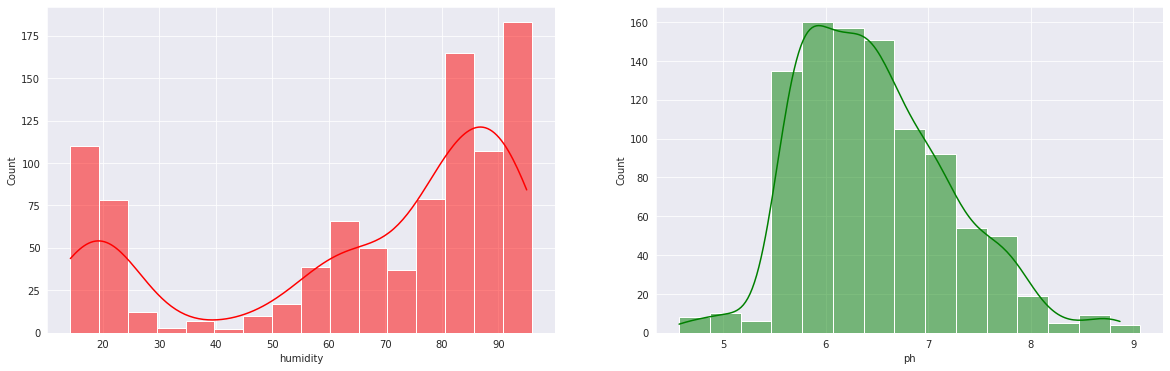

In [15]:
plt.figure(figsize=(20,6))
Crop_Temperatures =data.query("temperature < 25 ") 
plt.subplot(1,2,1)
sns.histplot(Crop_Temperatures.humidity ,  binwidth=5.1 ,color="red" , kde={'alpha':0.5},)
plt.subplot(1,2,2)
sns.histplot(Crop_Temperatures.ph ,  binwidth=0.3 ,color="green" , kde={'alpha':0.5})
plt.show()

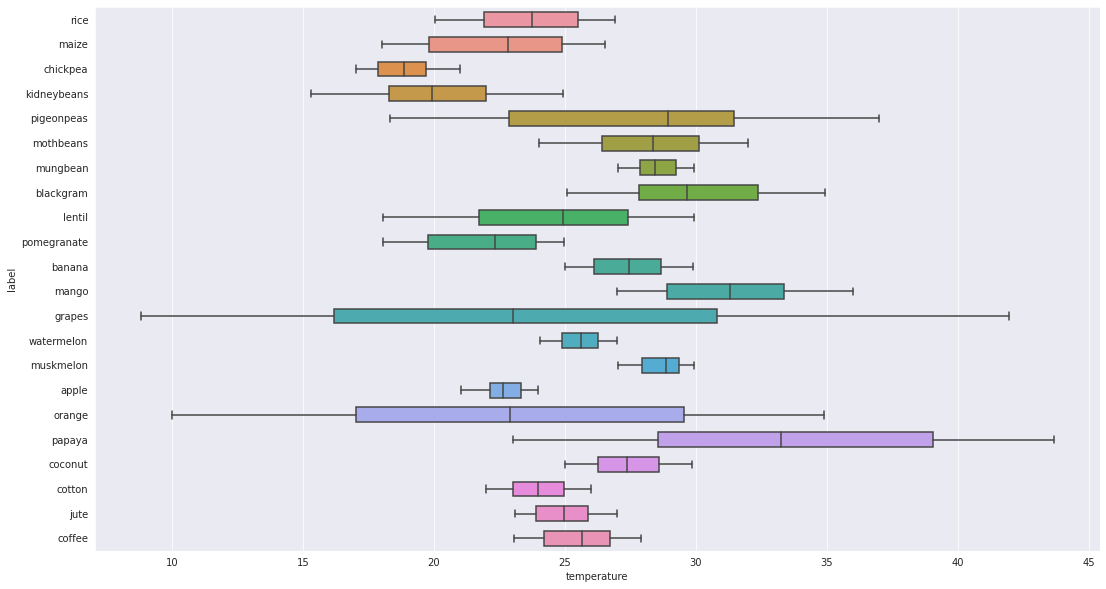

In [16]:
plt.figure(figsize=(18,10))
sns.boxplot(x="temperature", y="label", data=data,
            whis=[0, 100], width=.6 , orient="h")
plt.show()

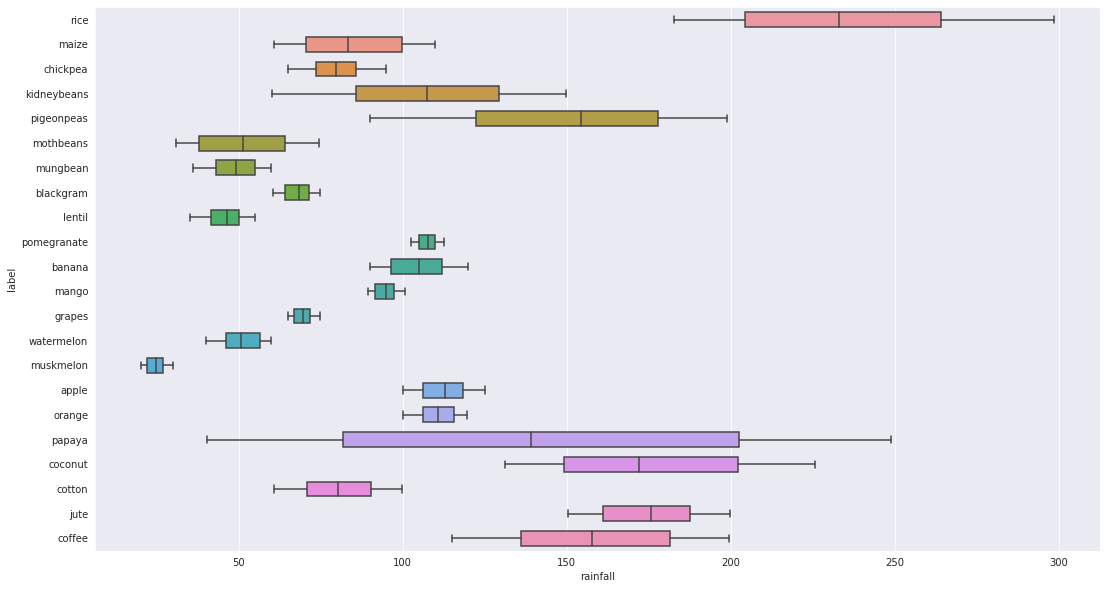

In [17]:
plt.figure(figsize=(18,10))
sns.boxplot(x="rainfall", y="label", data=data,
            whis=[0, 100], width=.6 , orient="h")
plt.show()

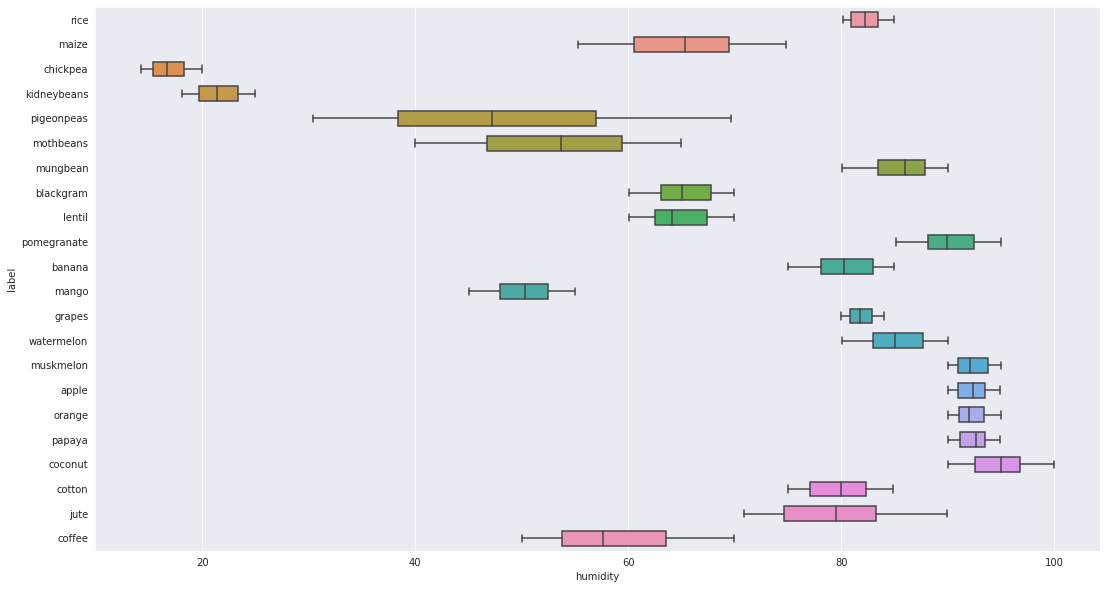

In [18]:
plt.figure(figsize=(18,10))
sns.boxplot(x="humidity", y="label", data=data,
            whis=[0, 100], width=.6 , orient="h")
plt.show()

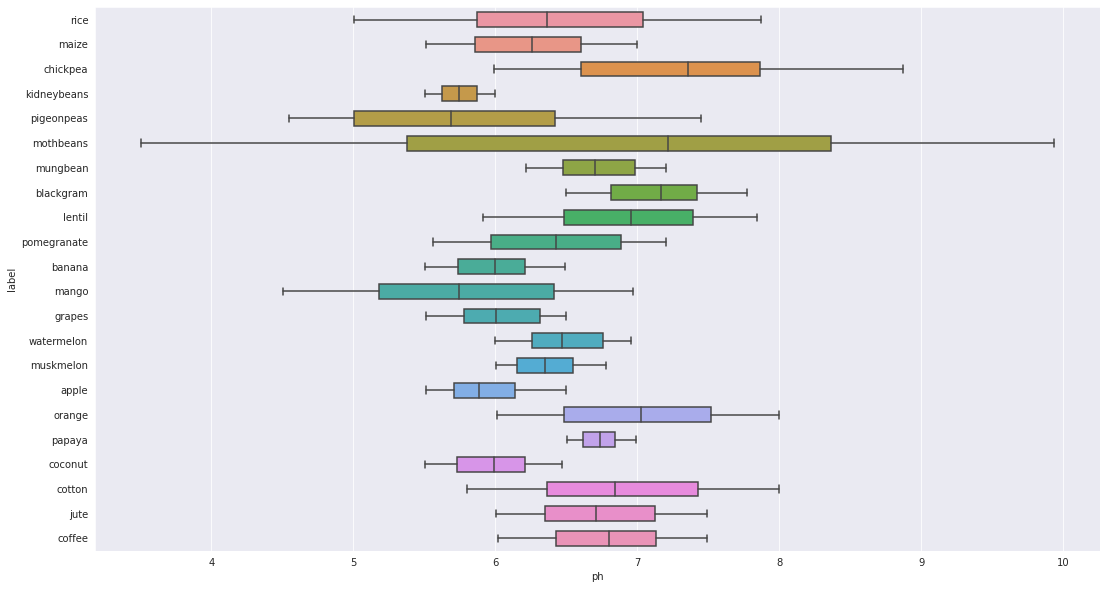

In [19]:
plt.figure(figsize=(18,10))
sns.boxplot(x="ph", y="label", data=data,
            whis=[0, 100], width=.6 , orient="h")
plt.show()

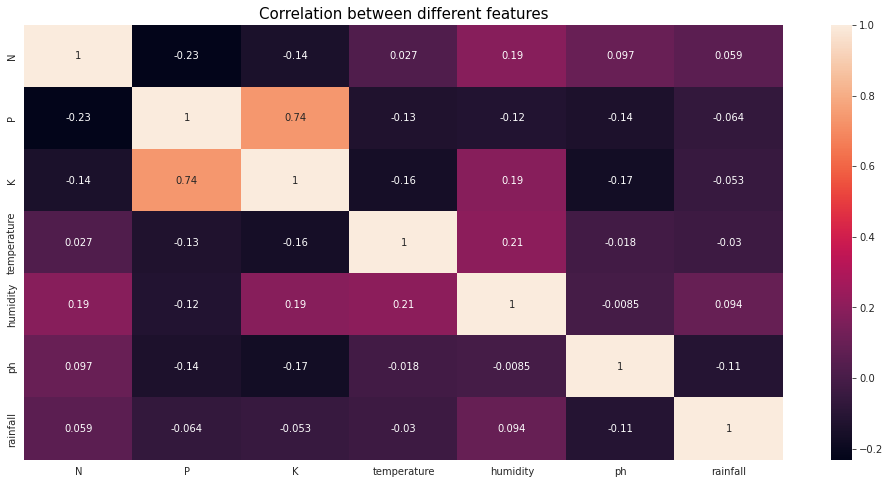

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
sns.heatmap(data.corr(), annot=True )
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [21]:
x = data.drop(['label'], axis = 1)
y = data['label']

print("The Shape of x:", x.shape)
print("The Shape of y:", y.shape)

The Shape of x: (2200, 7)
The Shape of y: (2200,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,shuffle = True, random_state = 0)

In [23]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred=kn_classifier.predict(X_test)

In [25]:
pred_kn = kn_classifier.predict(X_test)

In [26]:
print('Training set score: {:.4f}'.format(kn_classifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(kn_classifier.score(X_test, y_test)))

Training set score: 0.9886
Test set score: 0.9773


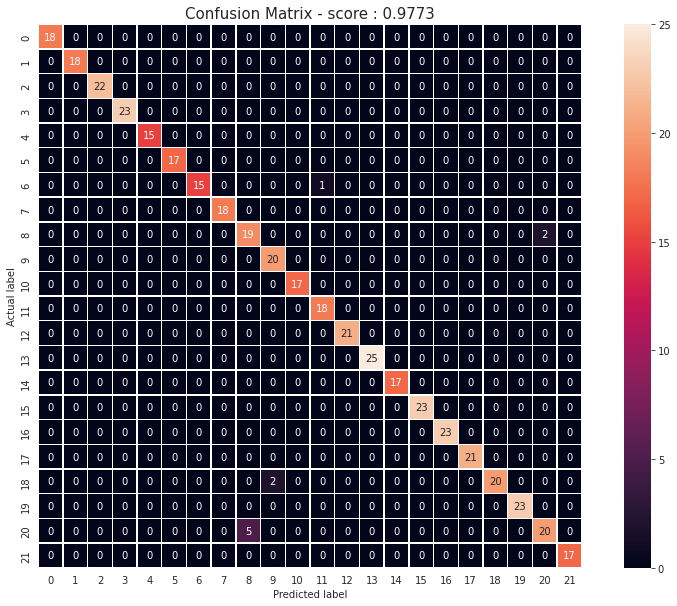

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score : {:.4f}'.format(kn_classifier.score(X_test, y_test))
plt.title(all_sample_title, size = 15);
plt.show()